In [1]:
'''
Anormaly Detection based on Sandy Hurricane on Tweet Data

Author: Ran JU
'''
#import the requirment package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#read data
df = pd.read_csv('data.csv')
df

,OBJECTID,TweetID,UserID,ReplyToTweet,ReplyToUser,X,Y,years,month,days,time,StatusCount,Text
0,1,2.797402e+17,826328725.0,null,null,40.758791,-73.981730,2012.0,12.0,14.0,00:10:41,407.0,City❤
1,8,2.779012e+17,826328725.0,null,null,40.864451,-74.195808,2012.0,12.0,9.0,22:22:57,407.0,So grateful to be amongst such gifted dancers....
2,46,2.692433e+17,826328725.0,null,null,40.865726,-74.195505,2012.0,11.0,15.0,00:59:43,407.0,SO SORE #dancemajor
3,59,2.674251e+17,826328725.0,null,null,40.724802,-74.005847,2012.0,11.0,10.0,00:34:48,407.0,Had an amazing birthday in nyc with @LaurenFly...
4,66,2.660887e+17,826328725.0,null,null,40.861667,-74.196480,2012.0,11.0,7.0,08:04:16,407.0,At the library til 3am...I've never felt like ...
5,67,2.659386e+17,826328725.0,null,null,40.865486,-74.194663,2012.0,11.0,6.0,22:07:52,407.0,For the guy using the punching bag at the gym ...
6,149,2.673680e+17,458581320.0,null,null,40.715830,-74.012417,2012.0,11.0,10.0,20:47:55,767.0,"I'm at Whole Foods (New York, NY) http://t.co/..."
7,189,2.591013e+17,458581320.0,null,null,40.747785,-73.986556,2012.0,10.0,18.0,01:19:05,767.0,Watermelon soju! (@ Pocha 32 w/ 3 others) [pic...
8,195,2.582759e+17,458581320.0,null,null,40.757622,-73.970695,2012.0,10.0,16.0,18:39:08,767.0,Yummy goodness! (@ Dig Inn Seasonal Market w/ ...
9,205,2.503070e+17,458581320.0,null,null,40.730236,-73.984177,2012.0,9.0,24.0,18:53:43,767.0,"I'm at S'Mac (New York, NY) [pic]: http://t.co..."


In [3]:
from textblob import TextBlob
import math
import re

In [4]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [5]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [46]:
SA = np.zeros(55600)
for i in range(55600):
    if df['Text'][i] != df['Text'][i]:
        continue
    else:
        SA[i] = analize_sentiment(df['Text'][i])
        #print(i)



array([ 0.,  1.,  0., ...,  1.,  1., -1.])

In [94]:
# create new column named "SA" means sentiment analysis
# 1 means positive msg
# 0 means netural msg
# -1 means negative msg
df['SA'] = SA

#Classify the data based on the date and the count
a = df.groupby(['years','month','days'],as_index=True).count()
a = a.reset_index()


In [30]:
# See the data from 2012.09.01-2012.12.15
# create two arrays that length is 106
SA_pos_portion = np.zeros(106)
SA_neg_portion = np.zeros(106)



In [31]:
index = 0
for i in range(9, 13):
    for j in range(32):
        temp = df[((df['month'] == i) & (df['days'] == j) ) ]
        row, column = temp.shape
        if(row ==0):
            continue
        else:
            #position portion in the specific date
            SA_pos_portion[index] = sum(temp['SA'] > 0)*100/len(temp['Text'])
            #negative portion in the specific date
            SA_neg_portion[index] = sum(temp['SA'] < 0)*100/len(temp['Text']) 
            index = index +1 
        

In [10]:
import matplotlib.pyplot as plt


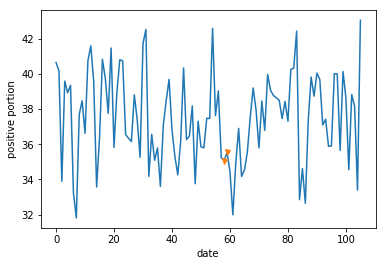

In [123]:
#draw the line chart, xlabel is date from 2012.09.01 to 2012.12.15
plt.plot(range(106), SA_pos_portion, '-')
plt.plot(range(58,60), SA_pos_portion[58:60], 'v',markersize=5)
plt.xlabel('date')
plt.ylabel('positive portion')
plt.show()

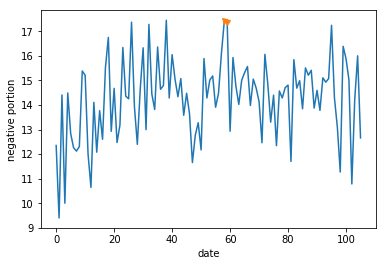

In [122]:
plt.plot(range(106), SA_neg_portion, '-')
plt.plot(range(58,60), SA_neg_portion[58:60], 'v',markersize=5)
plt.xlabel('date')
plt.ylabel('negative portion')
plt.show()

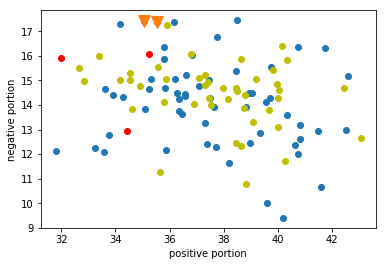

In [41]:
#scatter gram that show the negative and position portion
plt.plot(SA_pos_portion[0:57], SA_neg_portion[0:57], 'o')
plt.plot(SA_pos_portion[57:62], SA_neg_portion[57:62], 'ro')
plt.plot(SA_pos_portion[62:106], SA_neg_portion[62:106], 'yo')
plt.xlabel("positive portion")
plt.ylabel("negative portion")
plt.plot(SA_pos_portion[58:60], SA_neg_portion[58:60], 'v',markersize=12)
plt.show()

In [39]:
SA_pos_portion[0:59]

array([ 40.6374502 ,  40.17094017,  33.89830508,  39.58333333,
        38.92045455,  39.3442623 ,  33.24250681,  31.81818182,
        37.69230769,  38.46153846,  36.61971831,  40.75      ,
        41.58415842,  39.5465995 ,  33.57487923,  36.36363636,
        40.82191781,  39.73684211,  37.75      ,  41.46341463,
        35.82089552,  38.97550111,  40.79497908,  40.73170732,
        36.5535248 ,  36.34204276,  36.15023474,  38.80597015,
        37.39669421,  35.25773196,  41.72335601,  42.51101322,
        34.17475728,  36.56884876,  35.0877193 ,  35.78732106,
        33.60824742,  37.08333333,  38.4787472 ,  39.68253968,
        36.82432432,  35.3046595 ,  34.26573427,  36.18090452,
        40.32921811,  36.26865672,  36.45621181,  38.17567568,
        33.75912409,  37.31092437,  35.85526316,  35.79454254,
        37.47680891,  37.45874587,  42.57425743,  37.62811127,
        39.02728351,  35.2297593 ,  35.07148865])

In [116]:
# the count is the total number of tweet msg in each day 
data_group = df.groupby(['years','month','days']).count().reset_index()
data_group['years'] = data_group['years'].astype(int)
data_group['month'] = data_group['month'].astype(int)
data_group['days'] = data_group['days'].astype(int)
from datetime import datetime
data_group['date']= data_group.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['years'],x['month'], x['days']), "%Y %m %d"),axis=1)
# data_group.index= df['date']
data_group

,years,month,days,OBJECTID,TweetID,UserID,ReplyToTweet,ReplyToUser,X,Y,time,StatusCount,Text,date
0,2012,9,1,251,251,251,251,251,251,251,251,251,251,2012-09-01
1,2012,9,2,234,234,234,234,234,234,234,234,234,234,2012-09-02
2,2012,9,3,236,236,236,236,236,236,236,236,236,236,2012-09-03
3,2012,9,4,240,240,240,240,240,240,240,240,240,240,2012-09-04
4,2012,9,5,352,352,352,352,352,352,352,352,352,352,2012-09-05
5,2012,9,6,366,366,366,366,366,366,366,366,366,366,2012-09-06
6,2012,9,7,367,367,367,367,367,367,367,367,367,367,2012-09-07
7,2012,9,8,396,396,396,396,396,396,396,396,396,396,2012-09-08
8,2012,9,9,390,390,390,390,390,390,390,390,390,390,2012-09-09
9,2012,9,10,351,351,351,351,351,351,351,351,351,351,2012-09-10


In [62]:
#filter all valid data in ReplyToTweet
df1 = df[df['ReplyToTweet']!='null']
data_group_ReplytoTweet = df1.groupby(['years','month','days']).count()

#filter all valid data in ReplyToUser
df2 = df[df['ReplyToUser']!='null']
data_group_ReplytoUser = df2.groupby(['years','month','days']).count()

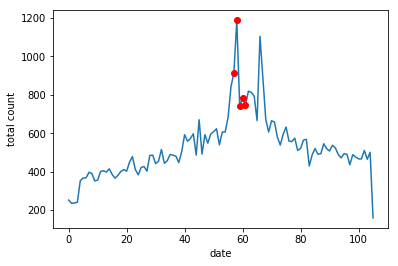

In [118]:
#line chart shows the total number of tweet msg in each day

plt.plot(range(0,106), data_group['OBJECTID'], '-')
plt.plot(range(57,62), data_group['OBJECTID'][57:62], 'ro')
plt.xlabel('date')
plt.ylabel('total count')
plt.show()

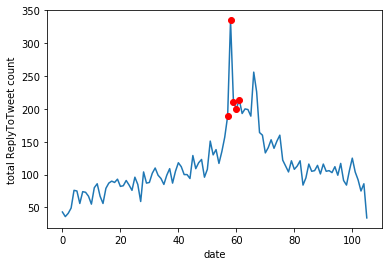

In [75]:
#line chart shows the total number of tweet msg in each day
plt.plot(range(106), data_group_ReplytoTweet['ReplyToTweet'], '-')
plt.plot(range(57,62), data_group_ReplytoTweet['ReplyToTweet'][57:62], 'ro')
plt.xlabel('date')
plt.ylabel('total ReplyToTweet count')
plt.show()

#the hill is 10.28

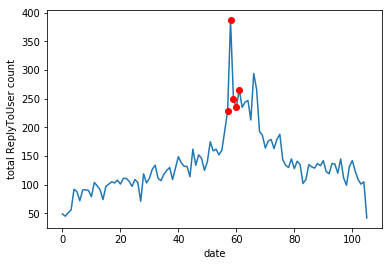

In [69]:
#line chart shows the total number of tweet ReplyToUser msg in each day
plt.plot(range(106), data_group_ReplytoUser['ReplyToUser'], '-')
plt.plot(range(57,62), data_group_ReplytoUser['ReplyToUser'][57:62], 'ro')
plt.xlabel('date')
plt.ylabel('total ReplyToUser count')
plt.show()

In [70]:
#data_group.head(57)

In [19]:
SA_pos_portion[59]

35.53162853297443

In [20]:
SA_pos_portion[61]

31.994645247657296

In [21]:
SA_pos_portion[58]

35.071488645920944

In [22]:
a = df.groupby(['years','month','days']).count()

In [23]:
# Anormly dete